# <center>Delhivery Business Case Study</center>

# Introduction
Delhivery, India's leading and rapidly growing integrated player, has set its sights on creating
the commerce operating system.
They achieve this by utilizing world-class infrastructure, ensuring the highest quality in
logistics operations, and harnessing cutting-edge engineering and technology capabilities.
### What is expected
The company wants to understand and process the data coming out of data engineering
pipelines: \
● Clean, sanitize and manipulate data to get useful features out of raw fields \
● Make sense out of the raw data and help the data science team to build forecasting
models on it.

# 1. Data

The analysis was done on the data located at -
 https://d2beiqkhq929f0.url=cloudfront.net/public_assets/assets/000/001/551/original/delhivery_data.csv?1642751181

# 2. Libraries
Below are the libraries required for analysing and visualizing data

In [1]:
# libraries to analyze data
import numpy as np
import pandas as pd
import scipy.stats as sps

# libraries to visualize data
import matplotlib.pyplot as plt
import seaborn as sns

# Misc libraries
import random

# 3. Data loading and exploratory data analysis

Loading the data into Pandas dataframe for easily handling of data

In [3]:
# read the file into a pandas dataframe
!wget -O delhivery_data.csv "https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/551/original/delhivery_data.csv?1642751181"

df = pd.read_csv('delhivery_data.csv')
# look at the datatypes of the columns
print('*************************************************')
print(df.info())
print('*************************************************\n')
print('*************************************************')
print(f'Shape of the dataset is {df.shape}')
print('*************************************************\n')
print('*************************************************')
print(f'Number of nan/null values in each column: \n{df.isna().sum()}')
print('*************************************************\n')
print('*************************************************')
print(f'Number of unique values in each column: \n{df.nunique()}')
print('*************************************************\n')
print('*************************************************')
print(f'Duplicate entries: \n{df.duplicated().value_counts()}')
print('*************************************************')

--2025-06-02 03:31:01--  https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/551/original/delhivery_data.csv?1642751181
Resolving d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)... 3.169.201.143, 3.169.201.156, 3.169.201.14, ...
Connecting to d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)|3.169.201.143|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 55617130 (53M) [text/plain]
Saving to: ‘delhivery_data.csv’

delhivery_data.csv  100%[===================>]  53.04M  77.2MB/s    in 0.7s    

2025-06-02 03:31:02 (77.2 MB/s) - ‘delhivery_data.csv’ saved [55617130/55617130]

*************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   tr

In [4]:
# look at the top 5 rows
df.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000


## Insight
- A quick look at the information of the data reveals that there are **144867 rows and 24 columns** implying 144867 trips have been made with each trip having information such as *trip_creation_time, trip_uuid, source_center, source_name, destination_center, destination_name* to name a few. Most of the datatype are either "object" or "float64" except for *is_cutoff* and *cutoff_factor*.
- We can also infer that **there are 293 missing values or null value in source_name and 261 missing values or null value in destination_name** in the dataset. As these numbers are small compared to dataset size, 144867, it is safe to drop the rows with the missing values
- There are **no duplicate entries**.
- As columns *is_cutoff, cutoff_factor, cutoff_timestamp, factor and segment_factor* are Unknown fields,there is no harm in dropping these columns.
- It makes sense to convert columns *data and route_type* to "category" datatype
- It makes sense to convert columns *trip_creation_time, od_start_time, od_end_time* to "datetime" datatype

In [5]:
df = df.dropna(how='any')
df = df.drop(columns = ["is_cutoff", "cutoff_factor", "cutoff_timestamp", "factor", "segment_factor"])
df["data"] = df["data"].astype("category")
df["route_type"] = df["route_type"].astype("category")
df["trip_creation_time"] = pd.to_datetime(df["trip_creation_time"], format='%Y-%m-%d %H:%M:%S.%f')
df["od_start_time"] = pd.to_datetime(df["od_start_time"], format='%Y-%m-%d %H:%M:%S.%f')
df["od_end_time"] = pd.to_datetime(df["od_end_time"], format='%Y-%m-%d %H:%M:%S.%f')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 144316 entries, 0 to 144866
Data columns (total 19 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   data                            144316 non-null  category      
 1   trip_creation_time              144316 non-null  datetime64[ns]
 2   route_schedule_uuid             144316 non-null  object        
 3   route_type                      144316 non-null  category      
 4   trip_uuid                       144316 non-null  object        
 5   source_center                   144316 non-null  object        
 6   source_name                     144316 non-null  object        
 7   destination_center              144316 non-null  object        
 8   destination_name                144316 non-null  object        
 9   od_start_time                   144316 non-null  datetime64[ns]
 10  od_end_time                     144316 non-null  datetime64[n

In [7]:
df.describe()

,trip_creation_time,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
count,144316,144316,144316,144316.000000,144316.000000,144316.000000,144316.000000,144316.000000,144316.000000,144316.000000,144316.000000
mean,2018-09-22 13:05:09.454117120,2018-09-22 17:32:42.435769344,2018-09-23 09:36:54.057172224,963.697698,234.708498,417.996237,214.437055,285.549785,36.175379,18.495697,22.818993
min,2018-09-12 00:00:16.535741,2018-09-12 00:00:16.535741,2018-09-12 00:50:10.814399,20.000000,9.000045,9.000000,6.000000,9.008200,-244.000000,0.000000,0.000000
25%,2018-09-17 02:46:11.004421120,2018-09-17 07:37:35.014584832,2018-09-18 01:29:56.978912,161.000000,23.352027,51.000000,27.000000,29.896250,20.000000,11.000000,12.053975
50%,2018-09-22 03:36:19.186585088,2018-09-22 07:35:23.038482944,2018-09-23 02:49:00.936600064,451.000000,66.135322,132.000000,64.000000,78.624400,28.000000,17.000000,23.508300
75%,2018-09-27 17:53:19.027942912,2018-09-27 22:01:30.861209088,2018-09-28 12:13:41.675546112,1645.000000,286.919294,516.000000,259.000000,346.305400,40.000000,22.000000,27.813325
max,2018-10-03 23:59:42.701692,2018-10-06 04:27:23.392375,2018-10-08 03:00:24.353479,7898.000000,1927.447705,4532.000000,1686.000000,2326.199100,3051.000000,1611.000000,2191.403700
std,NaN,NaN,NaN,1038.082976,345.480571,598.940065,308.448543,421.717826,53.524298,14.774008,17.866367


## Insight
- The data is provided from **2018-09-12 00:00:16.535741 to 2018-10-03 23:59:42.701692**
- The **average time** taken to deliver from source to destination is **964 mins** with **least time being 20mins** and **maximum time being 7898 mins**
- The **average distance** between source and destination warehouse is **235 Kms** with **least distance being 9 Kms** and **maximum distance being 1927 Kms**

# 4. Detailed Analysis
## 4.1. Detecting outliers
### 4.1.1. Outliers for every continuous variable

In [8]:
# helper function to detect outliers
def detectOutliers(df):
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    iqr = q3-q1
    lower_outliers = df[df<(q1-1.5*iqr)]
    higher_outliers = df[df>(q3+1.5*iqr)]
    return lower_outliers, higher_outliers

In [9]:
numerical_columns = ['start_scan_to_end_scan', 'actual_distance_to_destination', 'actual_time', 'osrm_time', 'osrm_distance', 'segment_actual_time', 'segment_osrm_time', 'segment_osrm_distance']
column_outlier_dictionary = {}
for column in numerical_columns:
    print('*'*50)
    print(f'Outliers of \'{column}\' column are:')
    lower_outliers, higher_outliers = detectOutliers(df[column])
    print("Lower outliers:\n", lower_outliers)
    print("Higher outliers:\n", higher_outliers)
    print('*'*50, end="\n")
    column_outlier_dictionary[column] = [lower_outliers, higher_outliers]

**************************************************
Outliers of 'start_scan_to_end_scan' column are:
Lower outliers:
 Series([], Name: start_scan_to_end_scan, dtype: float64)
Higher outliers:
 32950     3897.0
32951     3897.0
32952     3897.0
32953     3897.0
32954     3897.0
           ...  
79524     4239.0
79525     4239.0
79526     4239.0
79527     4239.0
123196    7898.0
Name: start_scan_to_end_scan, Length: 373, dtype: float64
**************************************************
**************************************************
Outliers of 'actual_distance_to_destination' column are:
Lower outliers:
 Series([], Name: actual_distance_to_destination, dtype: float64)
Higher outliers:
 402        704.090688
403        726.181078
404        748.332196
405        770.365887
406        796.335857
             ...     
144796    1611.171536
144797    1633.419313
144798    1650.202066
144799    1673.310381
144800    1689.639499
Name: actual_distance_to_destination, Length: 17818, dtype: fl

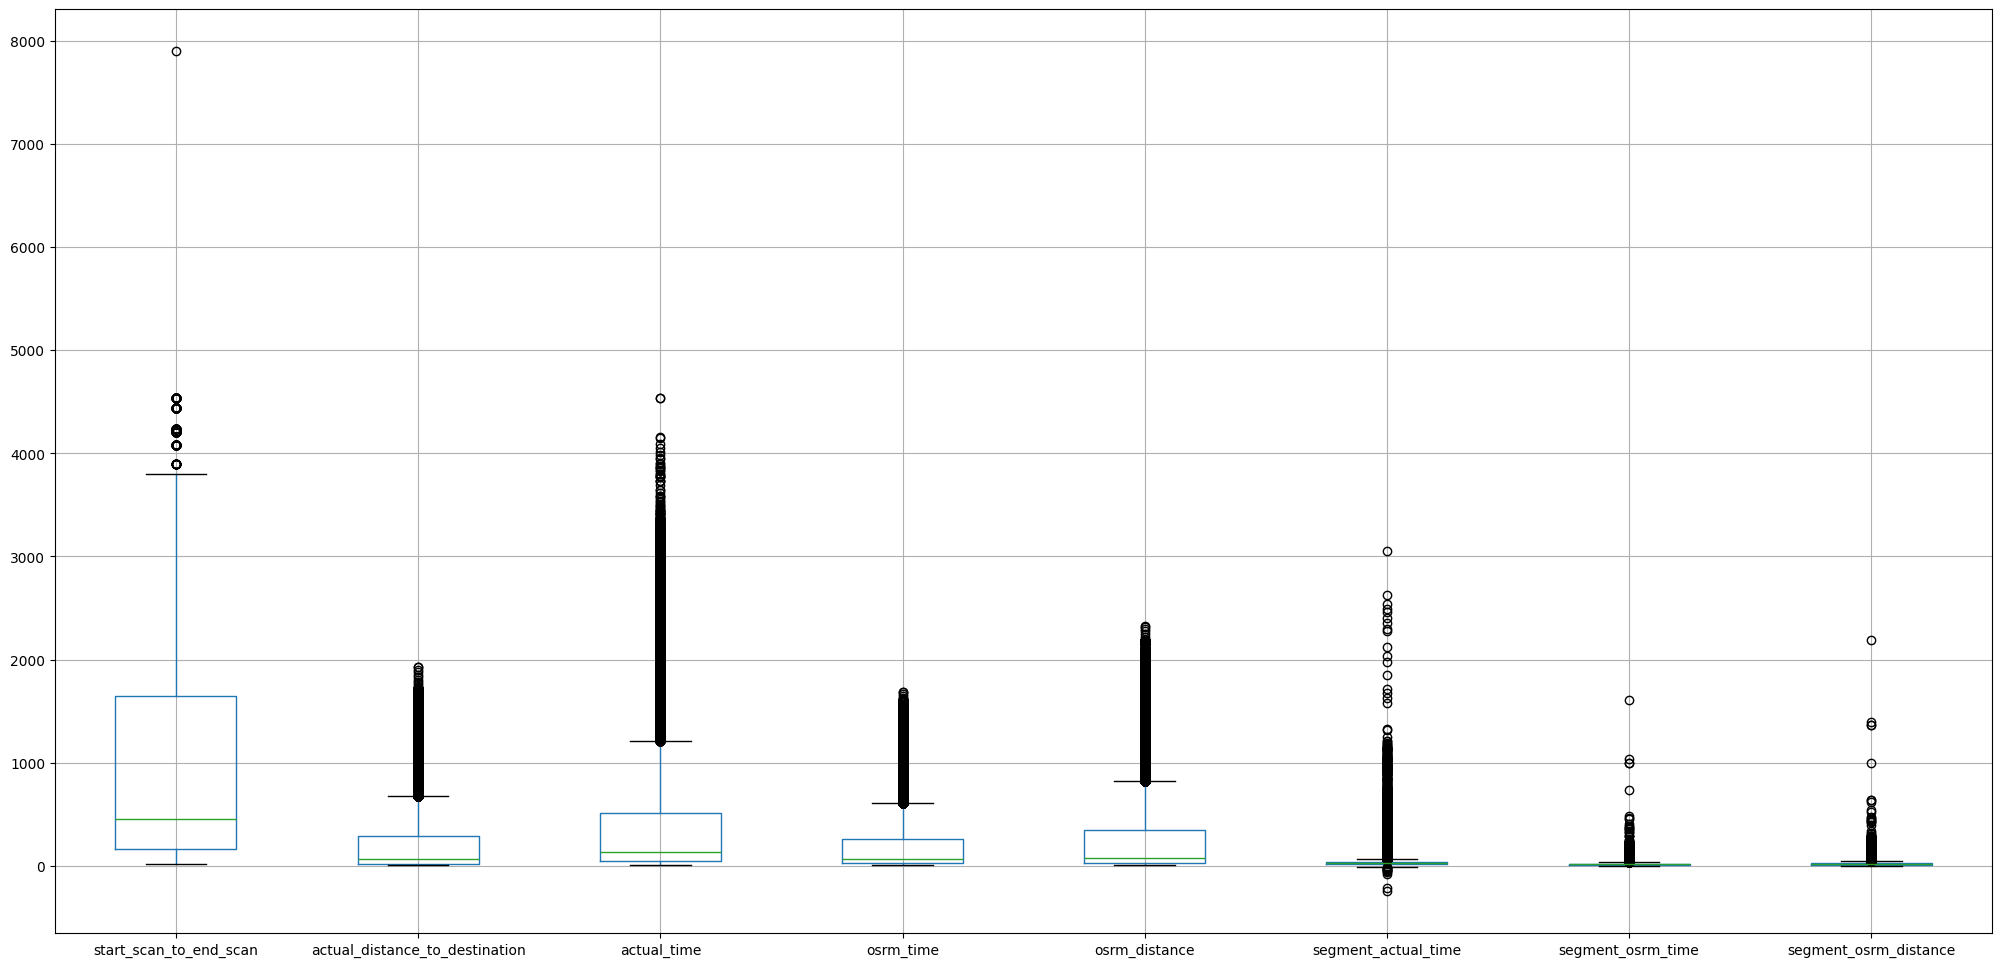

In [10]:
df[numerical_columns].boxplot(figsize=(25,12))
plt.show()

In [11]:
for key, value in column_outlier_dictionary.items():
    print(f'The column \'{key}\' has {len(value[0]) + len(value[1])} outliers')

The column 'start_scan_to_end_scan' has 373 outliers
The column 'actual_distance_to_destination' has 17818 outliers
The column 'actual_time' has 16507 outliers
The column 'osrm_time' has 17406 outliers
The column 'osrm_distance' has 17547 outliers
The column 'segment_actual_time' has 9262 outliers
The column 'segment_osrm_time' has 6348 outliers
The column 'segment_osrm_distance' has 4295 outliers


## Insight
- I will not be removing any outliers now.

### 4.1.2. Remove the outliers

In [12]:
remove_outliers = False
if True == remove_outliers:
    for key, value in column_outlier_dictionary.items():
        lower_outliers = value[0]
        higher_outliers = value[1]
        df.drop(lower_outliers.index, inplace=True)
        df.drop(higher_outliers.index, inplace=True)
else:
    print('Not removing any outliers')

Not removing any outliers


## 4.2. Univariate analysis
### 4.2.1. Numerical Variables

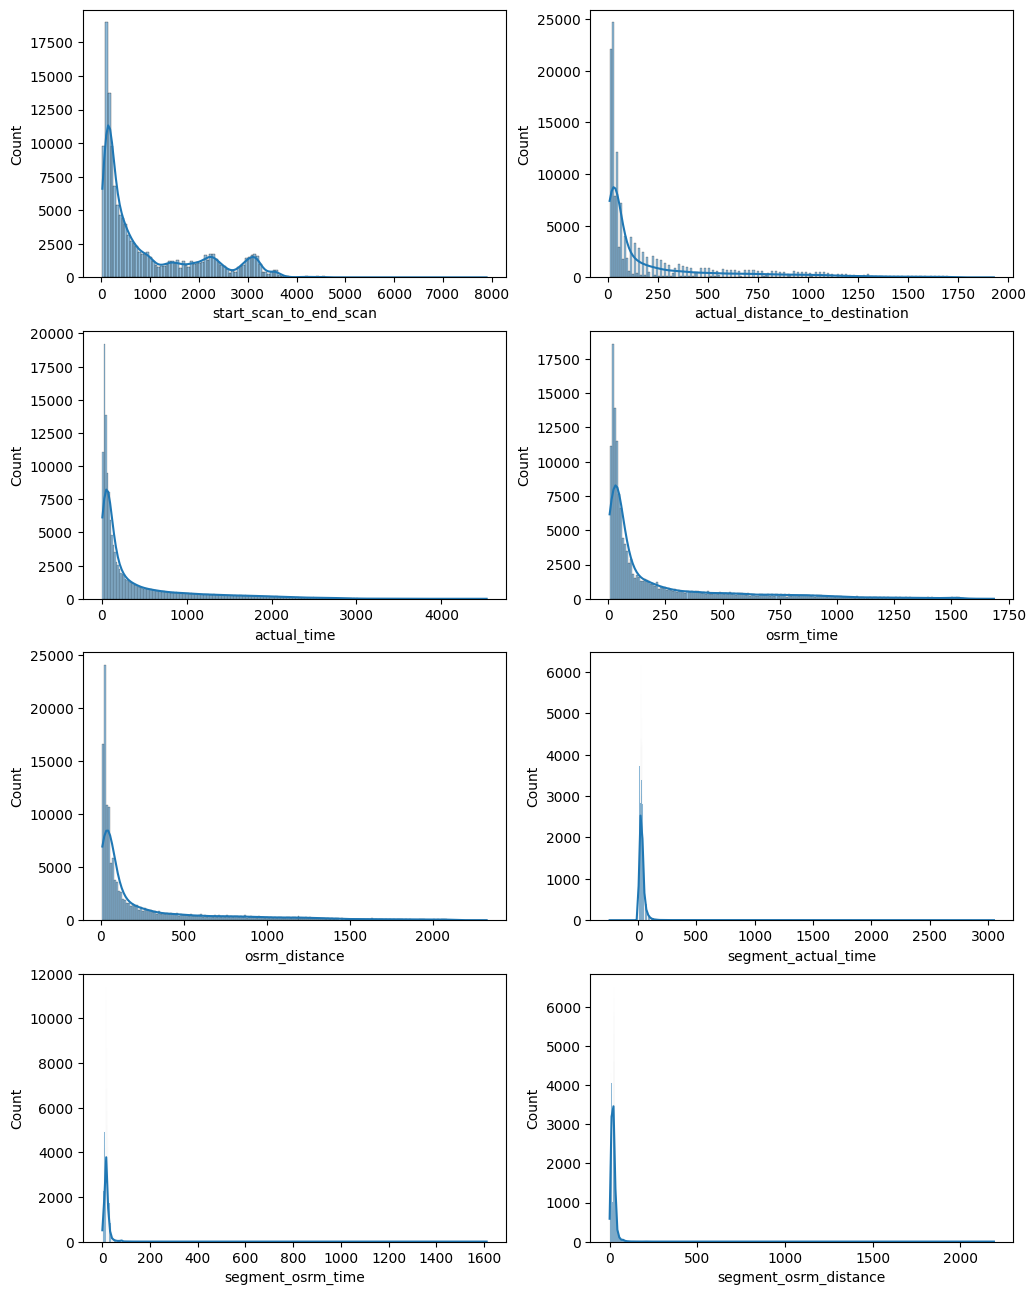

In [13]:
fig, ax = plt.subplots(nrows=4, ncols=2, figsize = (12, 16))
sns.histplot(data=df, x = "start_scan_to_end_scan", kde=True, ax=ax[0,0])
sns.histplot(data=df, x = "actual_distance_to_destination", kde=True, ax=ax[0,1])
sns.histplot(data=df, x = "actual_time", kde=True, ax=ax[1,0])
sns.histplot(data=df, x = "osrm_time", kde=True, ax=ax[1,1])
sns.histplot(data=df, x = "osrm_distance", kde=True, ax=ax[2,0])
sns.histplot(data=df, x = "segment_actual_time", kde=True, ax=ax[2,1])
sns.histplot(data=df, x = "segment_osrm_time", kde=True, ax=ax[3,0])
sns.histplot(data=df, x = "segment_osrm_distance", kde=True, ax=ax[3,1])
plt.show()

### 4.2.2. Categorical Variables

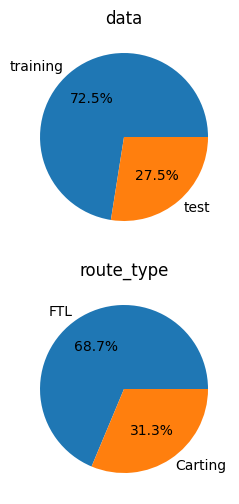

In [14]:
categorical_columns = ["data", "route_type"]
plt.figure(figsize=(6,6))
plt.subplot(2,1,1)
data = df["data"].value_counts()
plt.pie(data.values, labels = data.index, autopct='%.1f%%')
plt.title("data")
plt.subplot(2,1,2)
data = df["route_type"].value_counts()
plt.pie(data.values, labels = data.index, autopct='%.1f%%')
plt.title("route_type")
plt.show()

## Insight
- The histogram plot of all the **numerical** values show that all the **data is right skewed**
- **72.5%** of the data is **training** data and remaining **27.5%** is **testing** data
- **68.7%** of the delivery is done via **FTL** and remaining **31.3%** through **Carting**

## 4.3. Multivariate analysis

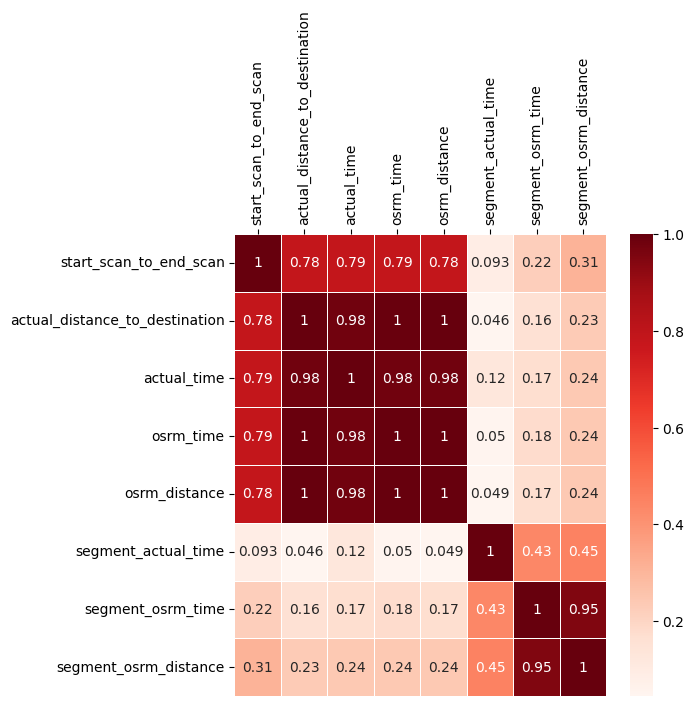

In [15]:
fig, ax = plt.subplots(figsize=(6,6))
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True, linewidth=0.5, cmap = "Reds", ax=ax)
ax.xaxis.tick_top()
plt.xticks(rotation=90)
plt.show()

## Insight
- The heatmap clearly shows high correlation between time and distance. This is expected as the delivery time increases with increase in distance
- *actual_distance_to_destination, actual_time, osrm_time and osrm_distance* are highly correlated
- *segment_osrm_time and segment_osrm_distance* are highly correlated

## 4.4. Merging rows
The delivery details of one package is divided into several rows.
Creating a unique identifier, called *segment_key*, for different segments of a trip based on the combination of *trip_uuid, source_center, and destination_center* and then merge the rows of columns *segment_actual_time,
segment_osrm_distance and segment_osrm_time* with same *segment_key* to form new columns *segment_actual_time_sum,
segment_osrm_distance_sum, segment_osrm_time_sum*

In [16]:
df["segment_key"] = df["trip_uuid"] + '_' + df["source_center"] + '_' + df["destination_center"]
df = df.drop(columns=["source_center", "destination_center"])
segment_columns = ["segment_actual_time", "segment_osrm_distance", "segment_osrm_time"]
for col in segment_columns:
    df[col + "_sum"] = df.groupby("segment_key")[col].cumsum()

In [17]:
df.head(10)

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_name,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,...,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_key,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,Anand_VUNagar_DC (Gujarat),Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,...,14.0,11.0,11.9653,14.0,11.0,11.9653,trip-153741093647649320_IND388121AAA_IND388620AAB,14.0,11.9653,11.0
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,Anand_VUNagar_DC (Gujarat),Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,...,24.0,20.0,21.7243,10.0,9.0,9.7590,trip-153741093647649320_IND388121AAA_IND388620AAB,24.0,21.7243,20.0
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,Anand_VUNagar_DC (Gujarat),Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,...,40.0,28.0,32.5395,16.0,7.0,10.8152,trip-153741093647649320_IND388121AAA_IND388620AAB,40.0,32.5395,27.0
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,Anand_VUNagar_DC (Gujarat),Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,...,62.0,40.0,45.5620,21.0,12.0,13.0224,trip-153741093647649320_IND388121AAA_IND388620AAB,61.0,45.5619,39.0
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,Anand_VUNagar_DC (Gujarat),Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,...,68.0,44.0,54.2181,6.0,5.0,3.9153,trip-153741093647649320_IND388121AAA_IND388620AAB,67.0,49.4772,44.0
5,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,Khambhat_MotvdDPP_D (Gujarat),Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,2018-09-20 06:36:55.627764,109.0,...,15.0,11.0,12.1171,15.0,11.0,12.1171,trip-153741093647649320_IND388620AAB_IND388320AAA,15.0,12.1171,11.0
6,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,Khambhat_MotvdDPP_D (Gujarat),Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,2018-09-20 06:36:55.627764,109.0,...,44.0,17.0,21.2890,28.0,6.0,9.1719,trip-153741093647649320_IND388620AAB_IND388320AAA,43.0,21.2890,17.0
7,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,Khambhat_MotvdDPP_D (Gujarat),Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,2018-09-20 06:36:55.627764,109.0,...,65.0,29.0,35.8252,21.0,11.0,14.5362,trip-153741093647649320_IND388620AAB_IND388320AAA,64.0,35.8252,28.0
8,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,Khambhat_MotvdDPP_D (Gujarat),Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,2018-09-20 06:36:55.627764,109.0,...,76.0,39.0,47.1900,10.0,10.0,11.3648,trip-153741093647649320_IND388620AAB_IND388320AAA,74.0,47.1900,38.0
9,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,Khambhat_MotvdDPP_D (Gujarat),Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,2018-09-20 06:36:55.627764,109.0,...,102.0,45.0,53.2334,26.0,6.0,6.0434,trip-153741093647649320_IND388620AAB_IND388320AAA,100.0,53.2334,44.0


Grouping the data by *segment_key*, with aggregation defined for each column, and creating a new dataframe *segment*

In [18]:
segment_dict = {
    'data' : 'first',
    'trip_creation_time' : 'first',
    'route_schedule_uuid' : 'first',
    'route_type' : 'first',
    'trip_uuid' : 'first',
    'source_name' : 'first',
    'destination_name' : 'last',
    'od_start_time' : 'first',
    'od_end_time' : 'last',
    'start_scan_to_end_scan' : 'first',
    'actual_distance_to_destination' : 'last',
    'actual_time' : 'last',
    'osrm_time' : 'last',
    'osrm_distance' : 'last',
    'segment_actual_time_sum' : 'last',
    'segment_osrm_distance_sum' : 'last',
    'segment_osrm_time_sum' : 'last',
}

segment_df = df.groupby('segment_key').agg(segment_dict).reset_index()
segment_df = segment_df.sort_values(by=['segment_key', 'od_end_time'], ascending=True).reset_index()

In [19]:
segment_df.head()

,index,segment_key,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_name,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum
0,0,trip-153671041653548748_IND209304AAA_IND000000ACB,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,Kanpur_Central_H_6 (Uttar Pradesh),Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,2018-09-13 13:40:23.123744,1260.0,383.759164,732.0,329.0,446.5496,728.0,670.6205,534.0
1,1,trip-153671041653548748_IND462022AAA_IND209304AAA,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,Bhopal_Trnsport_H (Madhya Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,999.0,440.973689,830.0,388.0,544.8027,820.0,649.8528,474.0
2,2,trip-153671042288605164_IND561203AAB_IND562101AAA,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,Doddablpur_ChikaDPP_D (Karnataka),Chikblapur_ShntiSgr_D (Karnataka),2018-09-12 02:03:09.655591,2018-09-12 03:01:59.598855,58.0,24.644021,47.0,26.0,28.1994,46.0,28.1995,26.0
3,3,trip-153671042288605164_IND572101AAA_IND561203AAB,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,Tumkur_Veersagr_I (Karnataka),Doddablpur_ChikaDPP_D (Karnataka),2018-09-12 00:00:22.886430,2018-09-12 02:03:09.655591,122.0,48.542890,96.0,42.0,56.9116,95.0,55.9899,39.0
4,4,trip-153671043369099517_IND000000ACB_IND160002AAC,training,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,trip-153671043369099517,Gurgaon_Bilaspur_HB (Haryana),Chandigarh_Mehmdpur_H (Punjab),2018-09-14 03:40:17.106733,2018-09-14 17:34:55.442454,834.0,237.439610,611.0,212.0,281.2109,608.0,317.7408,231.0


## 4.5. Feature Engineering
Extracting features from given data

Extracting time taken between *od_start_time* and *od_end_time*

In [20]:
segment_df['od_time_diff_hour'] = (segment_df['od_end_time'] - segment_df['od_start_time']).dt.total_seconds()/3600
segment_df = segment_df.drop(columns=['od_end_time', 'od_start_time'])

In [21]:
segment_df.head()

,index,segment_key,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_name,destination_name,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum,od_time_diff_hour
0,0,trip-153671041653548748_IND209304AAA_IND000000ACB,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,Kanpur_Central_H_6 (Uttar Pradesh),Gurgaon_Bilaspur_HB (Haryana),1260.0,383.759164,732.0,329.0,446.5496,728.0,670.6205,534.0,21.010074
1,1,trip-153671041653548748_IND462022AAA_IND209304AAA,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,Bhopal_Trnsport_H (Madhya Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),999.0,440.973689,830.0,388.0,544.8027,820.0,649.8528,474.0,16.658423
2,2,trip-153671042288605164_IND561203AAB_IND562101AAA,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,Doddablpur_ChikaDPP_D (Karnataka),Chikblapur_ShntiSgr_D (Karnataka),58.0,24.644021,47.0,26.0,28.1994,46.0,28.1995,26.0,0.980540
3,3,trip-153671042288605164_IND572101AAA_IND561203AAB,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,Tumkur_Veersagr_I (Karnataka),Doddablpur_ChikaDPP_D (Karnataka),122.0,48.542890,96.0,42.0,56.9116,95.0,55.9899,39.0,2.046325
4,4,trip-153671043369099517_IND000000ACB_IND160002AAC,training,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,trip-153671043369099517,Gurgaon_Bilaspur_HB (Haryana),Chandigarh_Mehmdpur_H (Punjab),834.0,237.439610,611.0,212.0,281.2109,608.0,317.7408,231.0,13.910649


Extracting city, place, code and state from  *source_name* and *destination_name*

In [22]:
segment_df['source_state'] = segment_df['source_name'].str.extract(r'\((.*?)\)')
segment_df['source_data'] = segment_df['source_name'].str.extract(r'^(.*?)\(')
segment_df['source_data'] = segment_df['source_data'].str.strip()

segment_df['destination_state'] = segment_df['destination_name'].str.extract(r'\((.*?)\)')
segment_df['destination_data'] = segment_df['destination_name'].str.extract(r'^(.*?)\(')
segment_df['destination_data'] =segment_df['destination_data'].str.strip()

In [23]:
def extract_city_place_code(name):
    parts = name.split('_')
    num_of_parts = len(parts)
    if(num_of_parts == 3):
        city = parts[0]
        place = parts[1]
        code = parts[2]
    elif(num_of_parts == 2):
        city = parts[0]
        place = parts[1]
        code = 'none'
    else:
        city = parts[0]
        place = city
        code = 'none'

    if city == 'Bangalore' or city == 'HBR Layout PC' or city == 'BLR':
        city = 'Bengaluru'
    elif city == 'Mumbai Hub' or city == 'BOM':
        city = 'Mumbai'
    elif city == 'Del':
        city = 'Delhi'
    elif city == 'PNQ Pashan DPC' or city == 'PNQ Vadgaon Sheri DPC':
        city = 'Pune'
    elif city == 'MAA':
        city = 'Chennai'
    elif city == 'FBD':
        city = 'Faridabad'
    elif city == 'CCU':
        city = 'Kolkata'
    elif city == 'AMD':
        city = 'Ahmedabad'
    elif city == 'FBD':
        city = 'Faridabad'
    elif city == 'GGN':
        city = 'Gurgaon'
    elif city == 'GZB':
        city = 'Ghaziabad'

    return [city, place, code]


In [24]:
extracted_df = segment_df['source_data'].apply(lambda x: extract_city_place_code(x))
segment_df[['source_city','source_place','source_code']] = pd.DataFrame(extracted_df.tolist(), index= segment_df.index)
extracted_df = segment_df['destination_data'].apply(lambda x: extract_city_place_code(x))
segment_df[['destination_city','destination_place','destination_code']] = pd.DataFrame(extracted_df.tolist(), index= segment_df.index)
segment_df = segment_df.drop(columns=['source_name', 'source_data', 'destination_name', 'destination_data'])
segment_df.head()

,index,segment_key,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,start_scan_to_end_scan,actual_distance_to_destination,actual_time,...,segment_osrm_time_sum,od_time_diff_hour,source_state,destination_state,source_city,source_place,source_code,destination_city,destination_place,destination_code
0,0,trip-153671041653548748_IND209304AAA_IND000000ACB,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,1260.0,383.759164,732.0,...,534.0,21.010074,Uttar Pradesh,Haryana,Kanpur,Kanpur,none,Gurgaon,Bilaspur,HB
1,1,trip-153671041653548748_IND462022AAA_IND209304AAA,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,999.0,440.973689,830.0,...,474.0,16.658423,Madhya Pradesh,Uttar Pradesh,Bhopal,Trnsport,H,Kanpur,Kanpur,none
2,2,trip-153671042288605164_IND561203AAB_IND562101AAA,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,58.0,24.644021,47.0,...,26.0,0.980540,Karnataka,Karnataka,Doddablpur,ChikaDPP,D,Chikblapur,ShntiSgr,D
3,3,trip-153671042288605164_IND572101AAA_IND561203AAB,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,122.0,48.542890,96.0,...,39.0,2.046325,Karnataka,Karnataka,Tumkur,Veersagr,I,Doddablpur,ChikaDPP,D
4,4,trip-153671043369099517_IND000000ACB_IND160002AAC,training,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,trip-153671043369099517,834.0,237.439610,611.0,...,231.0,13.910649,Haryana,Punjab,Gurgaon,Bilaspur,HB,Chandigarh,Mehmdpur,H


In [25]:
segment_df['trip_creation_year'] = segment_df['trip_creation_time'].dt.year
segment_df['trip_creation_month'] = segment_df['trip_creation_time'].dt.month
segment_df['trip_creation_day'] = segment_df['trip_creation_time'].dt.day
segment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26222 entries, 0 to 26221
Data columns (total 27 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   index                           26222 non-null  int64         
 1   segment_key                     26222 non-null  object        
 2   data                            26222 non-null  category      
 3   trip_creation_time              26222 non-null  datetime64[ns]
 4   route_schedule_uuid             26222 non-null  object        
 5   route_type                      26222 non-null  category      
 6   trip_uuid                       26222 non-null  object        
 7   start_scan_to_end_scan          26222 non-null  float64       
 8   actual_distance_to_destination  26222 non-null  float64       
 9   actual_time                     26222 non-null  float64       
 10  osrm_time                       26222 non-null  float64       
 11  os

## 4.6. In-depth analysis
### 4.6.1. Grouping and aggregating at trip-level
Group the *segment_df* by *trip_uuid*

In [26]:
trip_dict = {
    'segment_key' : 'first',
    'data' : 'first',
    'trip_creation_time' : 'first',
    'route_schedule_uuid' : 'first',
    'route_type' : 'first',
    'start_scan_to_end_scan' : 'sum',
    'actual_distance_to_destination' : 'sum',
    'actual_time' : 'sum',
    'osrm_time' : 'sum',
    'osrm_distance' : 'sum',
    'segment_actual_time_sum' : 'sum',
    'segment_osrm_distance_sum' : 'sum',
    'segment_osrm_time_sum' : 'sum',
    'od_time_diff_hour' : 'sum',
    'source_state' : 'first',
    'destination_state' : 'last',
    'source_city' : 'first',
    'source_place' : 'first',
    'source_code' : 'first',
    'destination_city' : 'last',
    'destination_place' : 'last',
    'destination_code' : 'last',
}
trip_df = segment_df.groupby('trip_uuid').agg(trip_dict).reset_index()

In [27]:
trip_df.head()

,trip_uuid,segment_key,data,trip_creation_time,route_schedule_uuid,route_type,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,...,segment_osrm_time_sum,od_time_diff_hour,source_state,destination_state,source_city,source_place,source_code,destination_city,destination_place,destination_code
0,trip-153671041653548748,trip-153671041653548748_IND209304AAA_IND000000ACB,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,2259.0,824.732854,1562.0,717.0,...,1008.0,37.668497,Uttar Pradesh,Uttar Pradesh,Kanpur,Kanpur,none,Kanpur,Kanpur,none
1,trip-153671042288605164,trip-153671042288605164_IND561203AAB_IND562101AAA,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,180.0,73.186911,143.0,68.0,...,65.0,3.026865,Karnataka,Karnataka,Doddablpur,ChikaDPP,D,Doddablpur,ChikaDPP,D
2,trip-153671043369099517,trip-153671043369099517_IND000000ACB_IND160002AAC,training,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,3933.0,1927.404273,3347.0,1740.0,...,1941.0,65.572709,Haryana,Haryana,Gurgaon,Bilaspur,HB,Gurgaon,Bilaspur,HB
3,trip-153671046011330457,trip-153671046011330457_IND400072AAB_IND401104AAA,training,2018-09-12 00:01:00.113710,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,Carting,100.0,17.175274,59.0,15.0,...,16.0,1.674916,Maharashtra,Maharashtra,Mumbai,Mumbai Hub,none,Mumbai,MiraRd,IP
4,trip-153671052974046625,trip-153671052974046625_IND583101AAA_IND583201AAA,training,2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,717.0,127.448500,341.0,117.0,...,115.0,11.972484,Karnataka,Karnataka,Bellary,Dc,none,Sandur,WrdN1DPP,D


### 4.6.2. Outlier Detection & Treatment

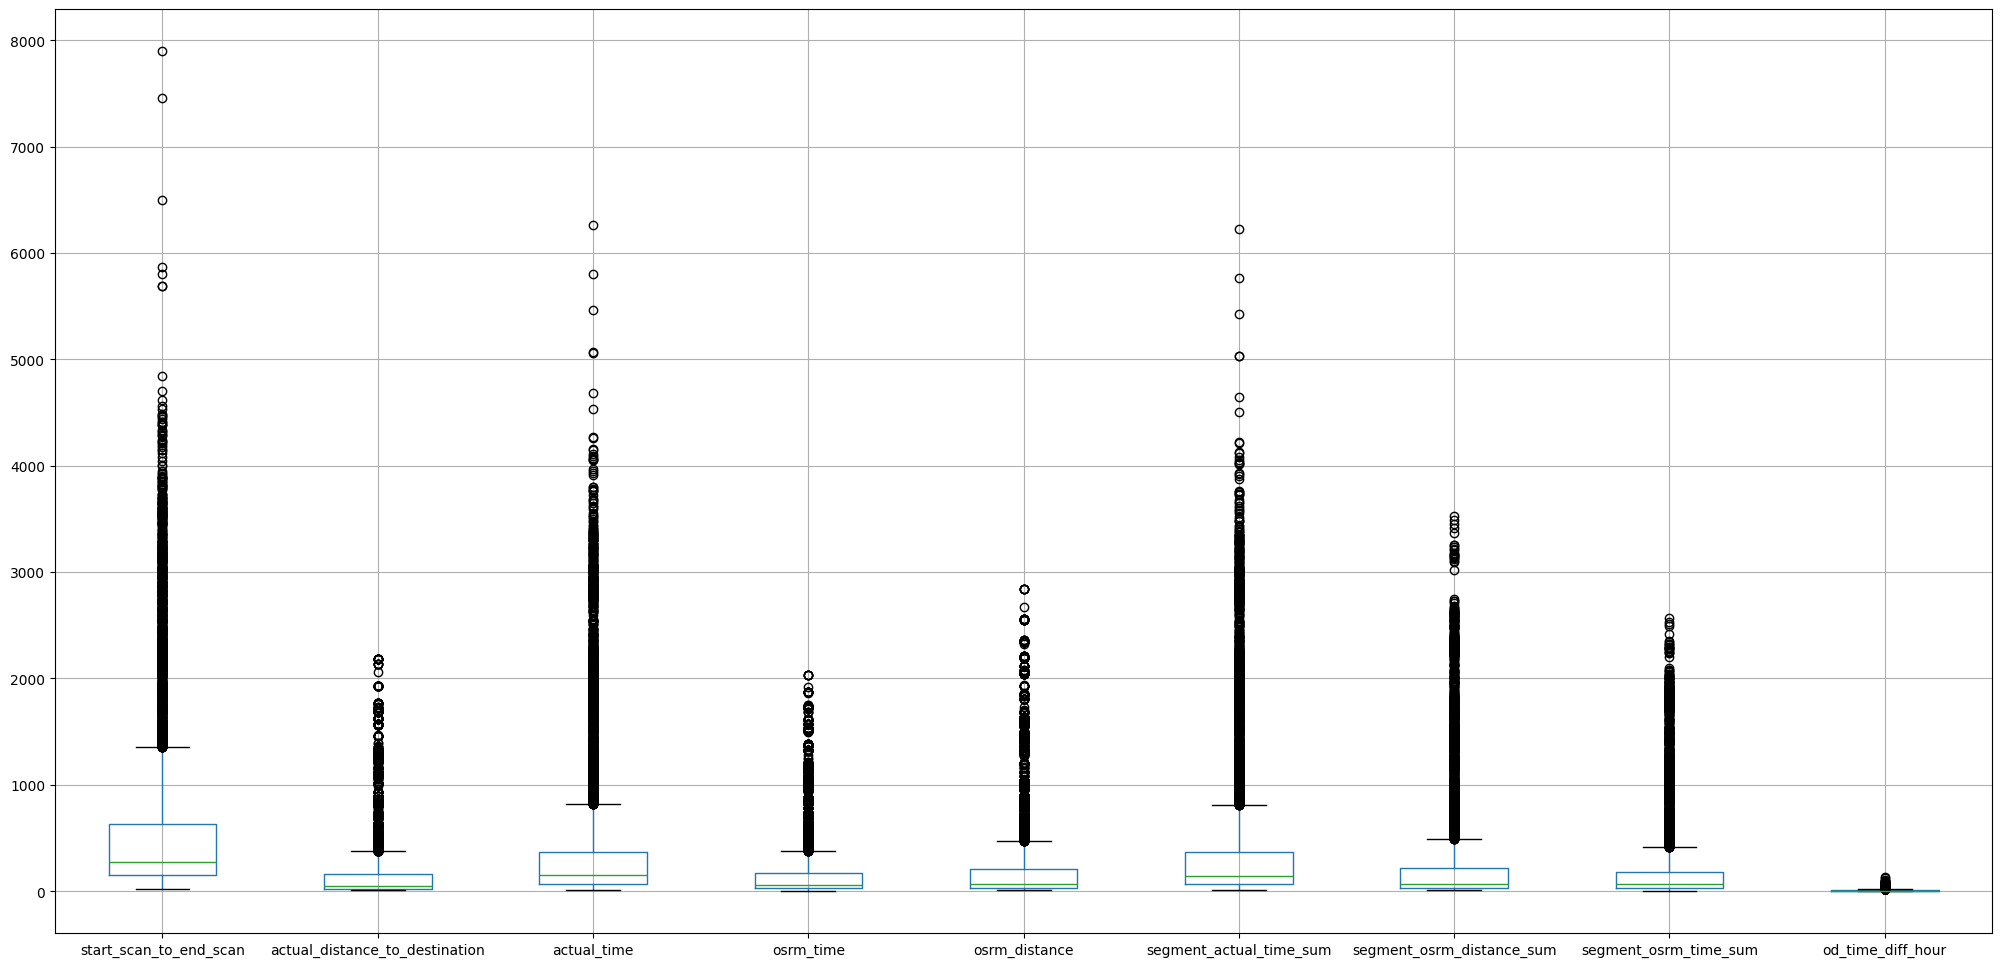

In [28]:
trip_numerical_columns = ['start_scan_to_end_scan', 'actual_distance_to_destination',
                          'actual_time', 'osrm_time', 'osrm_distance', 'segment_actual_time_sum',
                          'segment_osrm_distance_sum', 'segment_osrm_time_sum', 'od_time_diff_hour']
trip_df[trip_numerical_columns].boxplot(figsize=(25,12))
plt.show()

In [29]:
Q1 = trip_df[trip_numerical_columns].quantile(0.25)
Q3 = trip_df[trip_numerical_columns].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5*IQR
higher_bound = Q3 + 1.5*IQR
trip_df = trip_df[-((trip_df[trip_numerical_columns] < lower_bound) | (trip_df[trip_numerical_columns] > higher_bound)).any(axis=1)]
trip_df = trip_df.reset_index(drop=True)

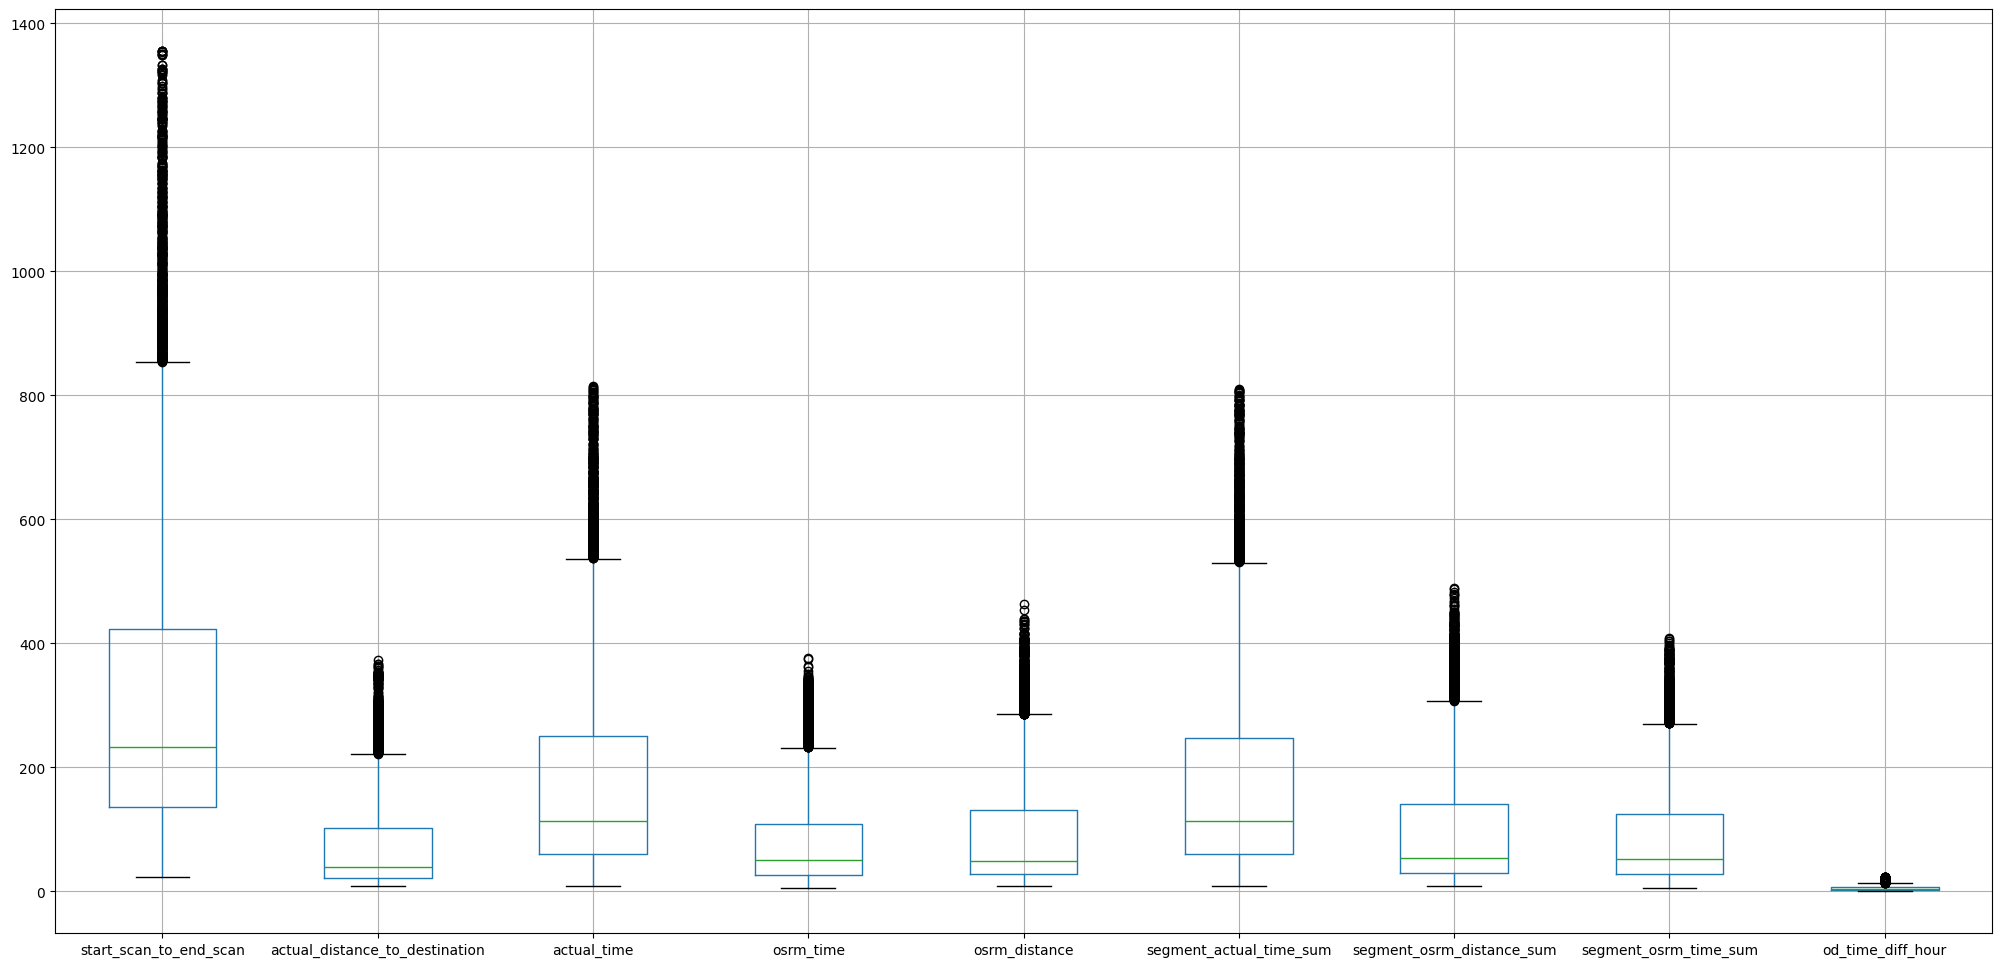

In [30]:
trip_df[trip_numerical_columns].boxplot(figsize=(25,12))
plt.show()

### 4.6.3. Perform one-hot encoding on categorical features
*route_type* is the only categorical feature

In [31]:
ohe_df = pd.get_dummies(trip_df['route_type'], dtype='int', prefix='route_type')
trip_df = pd.concat([trip_df, ohe_df], axis=1)
trip_df = trip_df.drop(columns='route_type')

In [ ]:
trip_df.head()

,trip_uuid,segment_key,data,trip_creation_time,route_schedule_uuid,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,...,source_state,destination_state,source_city,source_place,source_code,destination_city,destination_place,destination_code,route_type_Carting,route_type_FTL
0,trip-153671042288605164,trip-153671042288605164_IND561203AAB_IND562101AAA,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,180.0,73.186911,143.0,68.0,85.1110,...,Karnataka,Karnataka,Doddablpur,ChikaDPP,D,Doddablpur,ChikaDPP,D,1,0
1,trip-153671046011330457,trip-153671046011330457_IND400072AAB_IND401104AAA,training,2018-09-12 00:01:00.113710,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,100.0,17.175274,59.0,15.0,19.6800,...,Maharashtra,Maharashtra,Mumbai,Mumbai Hub,none,Mumbai,MiraRd,IP,1,0
2,trip-153671052974046625,trip-153671052974046625_IND583101AAA_IND583201AAA,training,2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,717.0,127.448500,341.0,117.0,146.7918,...,Karnataka,Karnataka,Bellary,Dc,none,Sandur,WrdN1DPP,D,0,1
3,trip-153671055416136166,trip-153671055416136166_IND600056AAA_IND602105AAB,training,2018-09-12 00:02:34.161600,thanos::sroute:9bf03170-d0a2-4a3f-aa4d-9aaab3d...,189.0,24.597048,61.0,23.0,28.0647,...,Tamil Nadu,Tamil Nadu,Chennai,Poonamallee,none,Chennai,Poonamallee,none,1,0
4,trip-153671066201138152,trip-153671066201138152_IND600044AAD_IND600048AAA,training,2018-09-12 00:04:22.011653,thanos::sroute:a97698cc-846e-41a7-916b-88b1741...,98.0,9.100510,24.0,13.0,12.0184,...,Tamil Nadu,Tamil Nadu,Chennai,Chrompet,DPC,Chennai,Vandalur,Dc,1,0


In [32]:
print('Number of Carting route is ', trip_df[trip_df['route_type_Carting'] == 1]['route_type_Carting'].count())
print('Number of FTL route is ', trip_df[trip_df['route_type_FTL'] == 1]['route_type_FTL'].count())

Number of Carting route is  8812
Number of FTL route is  3911


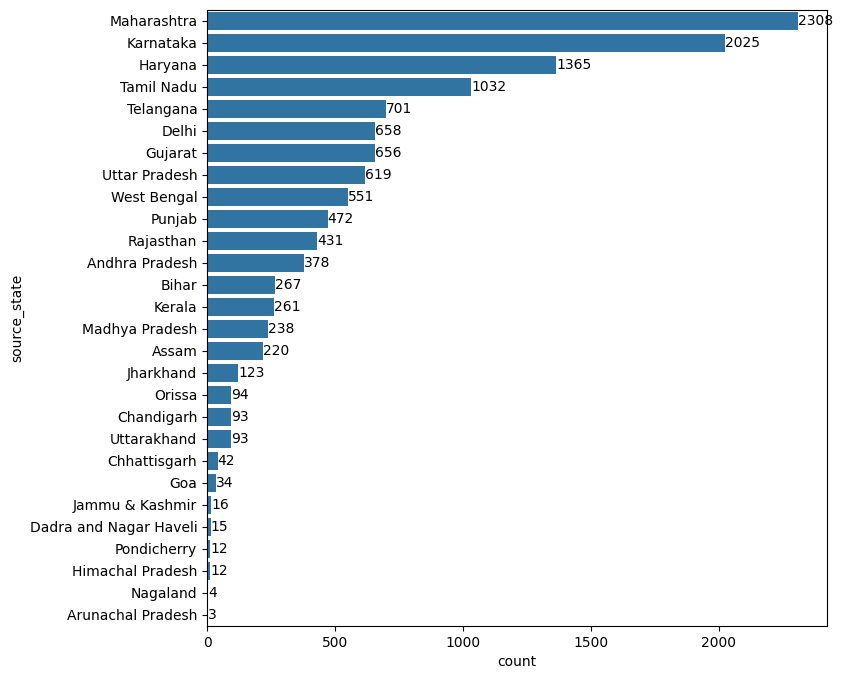

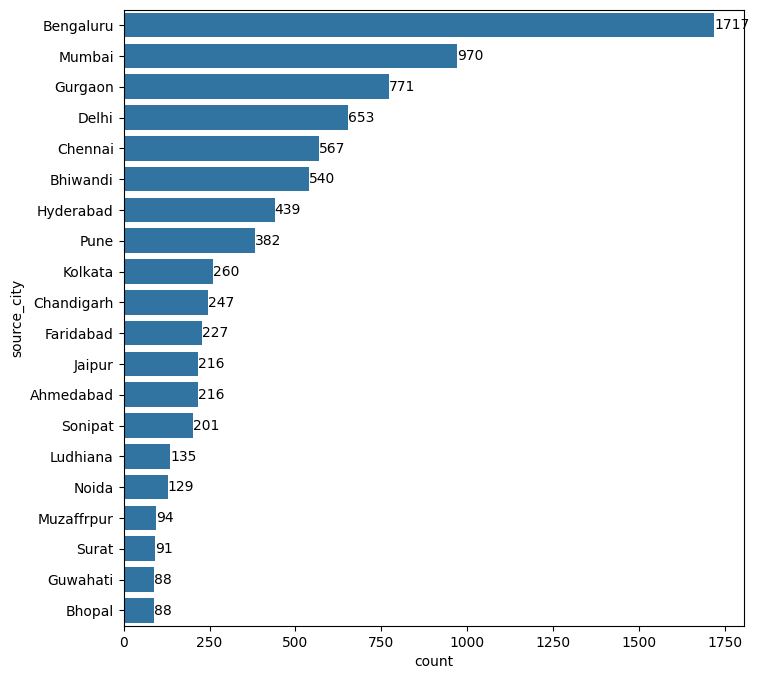

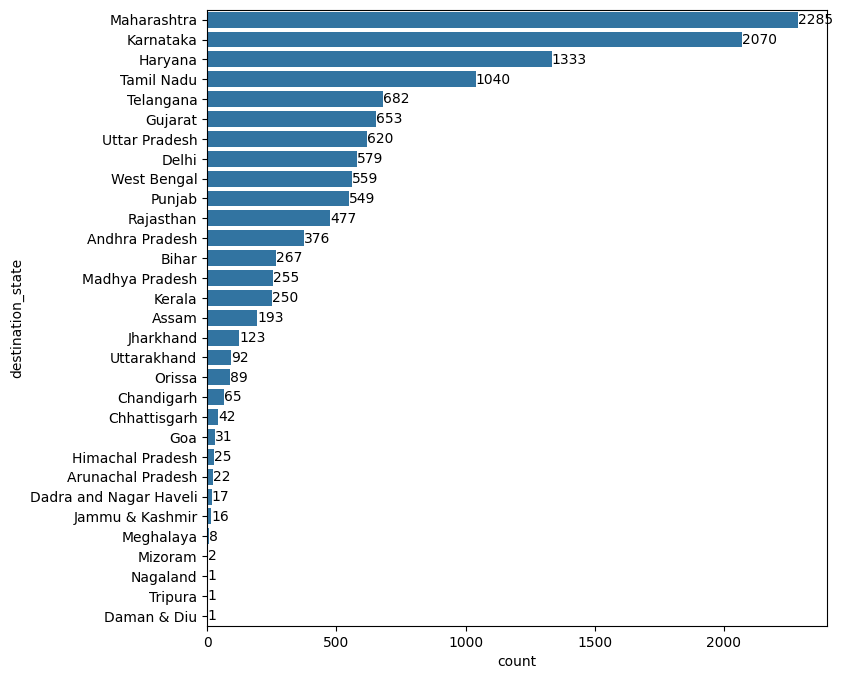

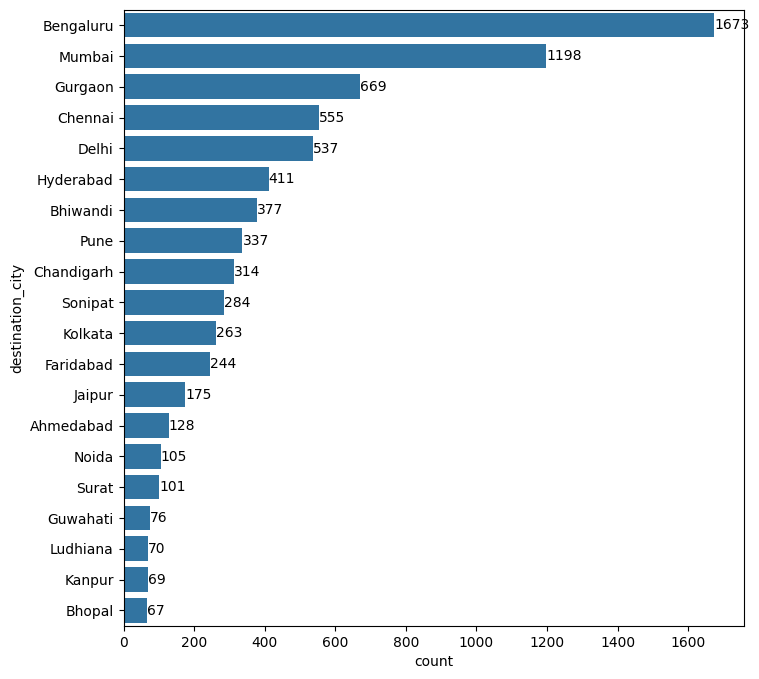

In [33]:
plt.figure(figsize=(8,8))
data = trip_df["source_state"]
ax=sns.countplot(y = data, order=data.value_counts().index)
ax.bar_label(ax.containers[0])
plt.show()

plt.figure(figsize=(8,8))
data = trip_df["source_city"]
ax=sns.countplot(y = data, order=data.value_counts()[:20].index)
ax.bar_label(ax.containers[0])
plt.show()

plt.figure(figsize=(8,8))
data = trip_df["destination_state"]
ax=sns.countplot(y = data, order=data.value_counts().index)
ax.bar_label(ax.containers[0])
plt.show()

plt.figure(figsize=(8,8))
data = trip_df["destination_city"]
ax=sns.countplot(y = data, order=data.value_counts()[:20].index)
ax.bar_label(ax.containers[0])
plt.show()

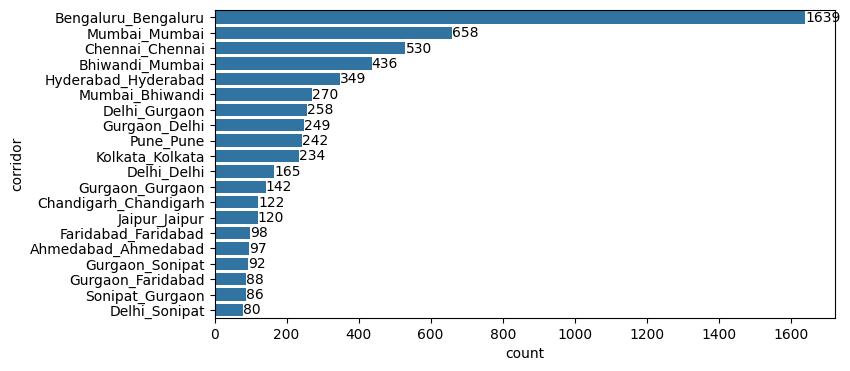

In [34]:
trip_df["corridor"] = trip_df["source_city"] + '_' + trip_df["destination_city"]
plt.figure(figsize=(8,4))
ax=sns.countplot(y = trip_df["corridor"], order=trip_df["corridor"].value_counts()[:20].index)
ax.bar_label(ax.containers[0])
plt.show()

In [35]:
Mumbai_Bhiwandi_df = trip_df[((trip_df["corridor"] == "Bhiwandi_Mumbai") | (trip_df["corridor"] == "Mumbai_Bhiwandi"))]
print('Avg time: ', Mumbai_Bhiwandi_df['actual_time'].mean())
print('Avg distance: ', Mumbai_Bhiwandi_df['actual_distance_to_destination'].mean())

Avg time:  81.8186968838527
Avg distance:  22.218624868058914


### 4.6.4. Normalize/ Standardize the numerical features using MinMaxScaler or StandardScaler

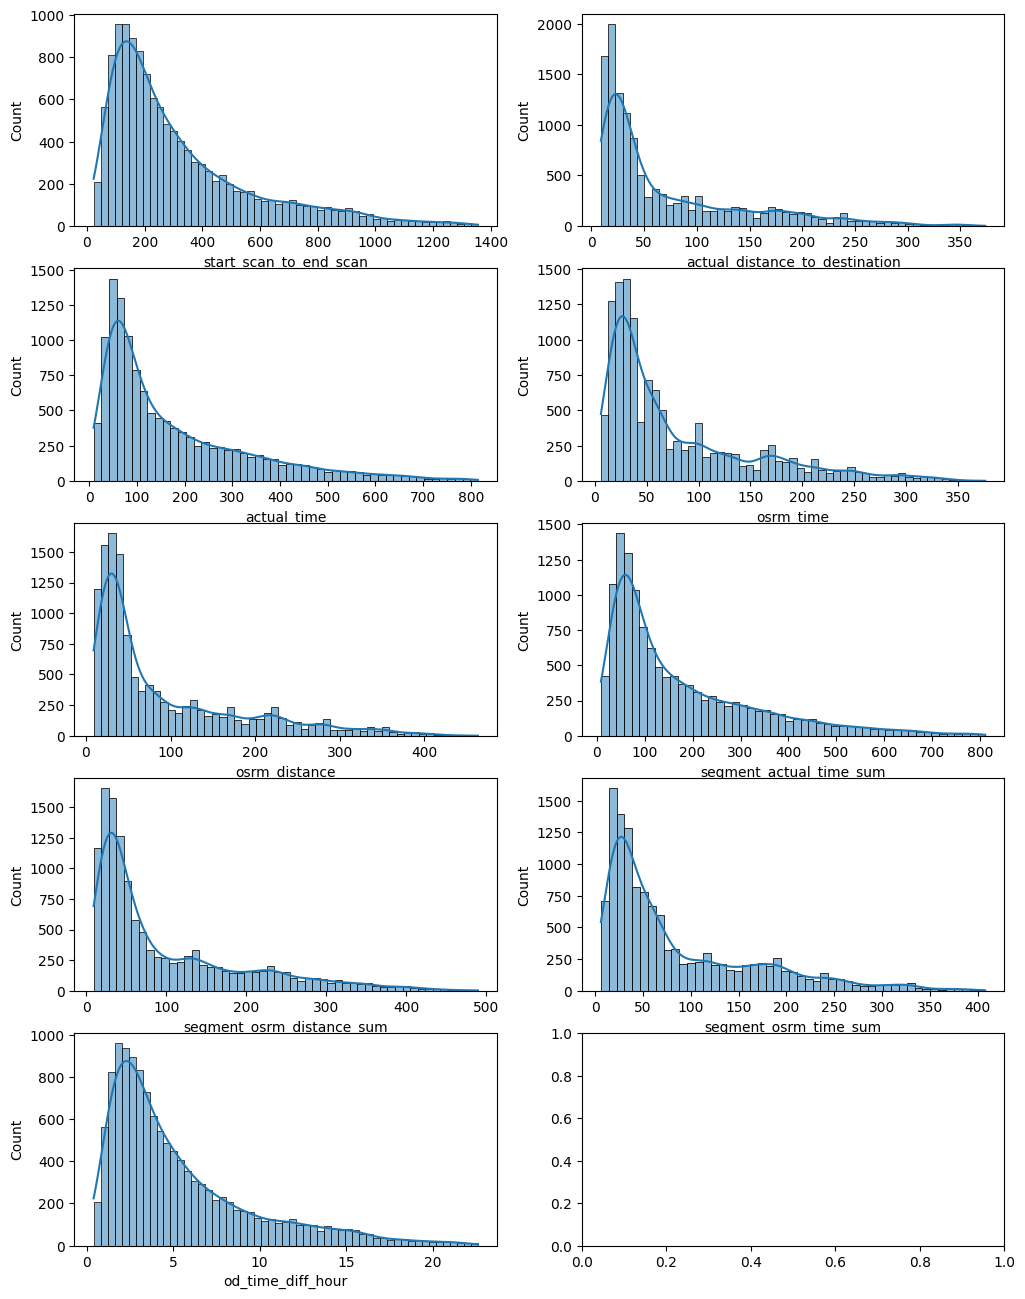

In [36]:
fig, ax = plt.subplots(nrows=5, ncols=2, figsize = (12, 16))
sns.histplot(data=trip_df, x = "start_scan_to_end_scan", kde=True, ax=ax[0,0])
sns.histplot(data=trip_df, x = "actual_distance_to_destination", kde=True, ax=ax[0,1])
sns.histplot(data=trip_df, x = "actual_time", kde=True, ax=ax[1,0])
sns.histplot(data=trip_df, x = "osrm_time", kde=True, ax=ax[1,1])
sns.histplot(data=trip_df, x = "osrm_distance", kde=True, ax=ax[2,0])
sns.histplot(data=trip_df, x = "segment_actual_time_sum", kde=True, ax=ax[2,1])
sns.histplot(data=trip_df, x = "segment_osrm_distance_sum", kde=True, ax=ax[3,0])
sns.histplot(data=trip_df, x = "segment_osrm_time_sum", kde=True, ax=ax[3,1])
sns.histplot(data=trip_df, x = "od_time_diff_hour", kde=True, ax=ax[4,0])
plt.show()

## Insight
- None of the data is gaussian, so we will use MinMaxScaler

In [37]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(trip_df[trip_numerical_columns])
trip_df[trip_numerical_columns] = scaler.transform(trip_df[trip_numerical_columns])

In [38]:
trip_df.describe()

,trip_creation_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum,od_time_diff_hour,route_type_Carting,route_type_FTL
count,12723,12723.000000,12723.000000,12723.000000,12723.000000,12723.000000,12723.000000,12723.000000,12723.000000,12723.000000,12723.000000,12723.000000
mean,2018-09-22 13:16:08.771620608,0.223107,0.173734,0.208998,0.195785,0.181911,0.208235,0.185013,0.198777,0.223070,0.692604,0.307396
min,2018-09-12 00:00:22.886430,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2018-09-17 03:12:27.545116928,0.084835,0.034006,0.064516,0.056757,0.042410,0.063670,0.042383,0.054726,0.084758,0.000000,0.000000
50%,2018-09-22 04:23:52.568071936,0.157658,0.081009,0.130273,0.118919,0.086587,0.129838,0.093689,0.116915,0.157495,1.000000,0.000000
75%,2018-09-27 20:46:53.577142016,0.300300,0.254284,0.300248,0.278378,0.269020,0.298377,0.273583,0.296020,0.300197,1.000000,1.000000
max,2018-10-03 23:59:42.701692,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
std,NaN,0.191859,0.197757,0.196217,0.195496,0.197107,0.196130,0.197335,0.198022,0.191827,0.461433,0.461433


## 4.7. Hypothesis Testing
### 4.7.1. aggregated *actual_time* and aggregated *osrm_time*
H0 : *actual_time* and *osrm_time* are similar \
H1 : *actual_time* and *osrm_time* are different

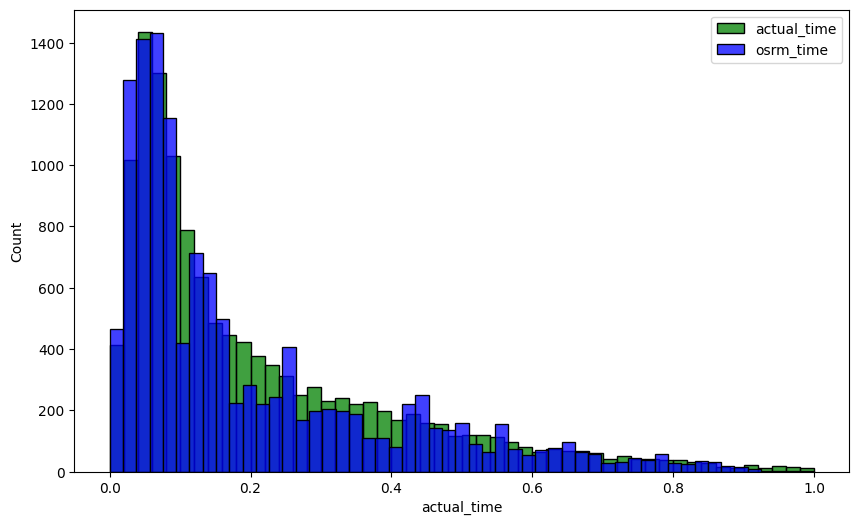

In [39]:
plt.figure(figsize=(10,6))
sns.histplot(trip_df['actual_time'], color='green')
sns.histplot(trip_df['osrm_time'], color='blue')
plt.legend(['actual_time', 'osrm_time'])
plt.show()

This is a 2 sample continuous skewed data, so we will use Mann-Whitney U Test

In [40]:
statistic, pvalue = sps.mannwhitneyu(trip_df['actual_time'], trip_df['osrm_time'], alternative='two-sided')
print('p-value', pvalue)
if pvalue < 0.1:
    print('The samples are not similar')
else:
    print('The samples are similar ')

p-value 1.3094485692382313e-20
The samples are not similar


### Insight
- *actual_time* and *osrm_time* are different

### 4.7.2. aggregated *actual_time* and aggregated *segment_actual_time*
H0 : *actual_time* and *segment_actual_time* are similar \
H1 : *actual_time* and *segment_actual_time* are different

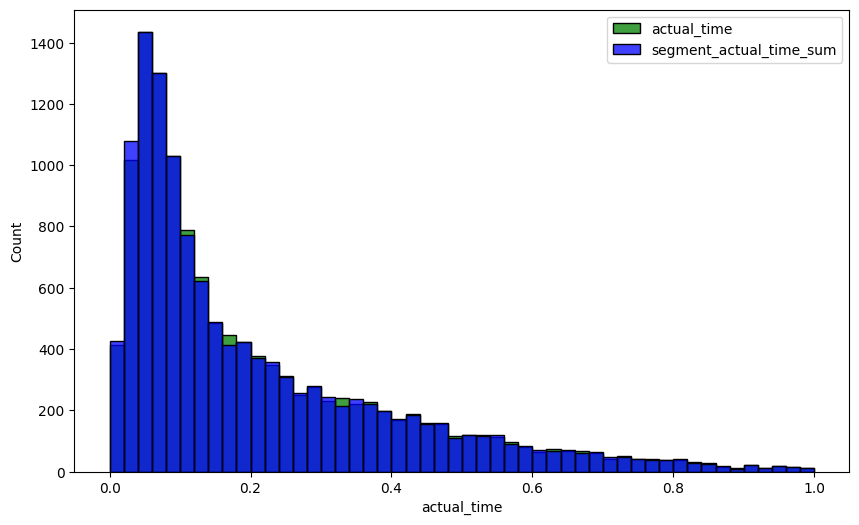

In [41]:
plt.figure(figsize=(10,6))
sns.histplot(trip_df['actual_time'], color='green')
sns.histplot(trip_df['segment_actual_time_sum'], color='blue')
plt.legend(['actual_time', 'segment_actual_time_sum'])
plt.show()

This is a 2 sample continuous skewed data, so we will use Mann-Whitney U Test

In [42]:
statistic, pvalue = sps.mannwhitneyu(trip_df['actual_time'], trip_df['segment_actual_time_sum'], alternative='two-sided')
print('p-value', pvalue)
if pvalue < 0.1:
    print('The samples are not similar')
else:
    print('The samples are similar ')

p-value 0.7167057478572094
The samples are similar 


### 4.7.3. aggregated *osrm_distance* and aggregated *segment_osrm_distance*
H0 : *osrm_distance* and *segment_osrm_distance* are similar \
H1 : *osrm_distance* and *segment_osrm_distance* are different

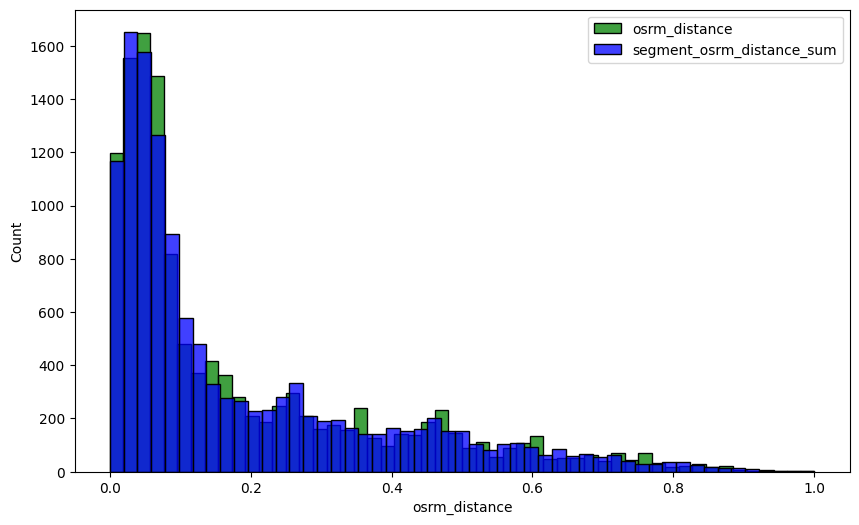

In [43]:
plt.figure(figsize=(10,6))
sns.histplot(trip_df['osrm_distance'], color='green')
sns.histplot(trip_df['segment_osrm_distance_sum'], color='blue')
plt.legend(['osrm_distance', 'segment_osrm_distance_sum'])
plt.show()

This is a 2 sample continuous skewed data, so we will use Mann-Whitney U Test

In [44]:
statistic, pvalue = sps.mannwhitneyu(trip_df['osrm_distance'], trip_df['segment_osrm_distance_sum'], alternative='two-sided')
print('p-value', pvalue)
if pvalue < 0.1:
    print('The samples are not similar')
else:
    print('The samples are similar ')

p-value 0.05751040543671224
The samples are not similar


### 4.7.4. aggregated *osrm_time* and aggregated *segment_osrm_time*
H0 : *osrm_time* and *segment_osrm_time* are similar \
H1 : *osrm_time* and *segment_osrm_time* are different

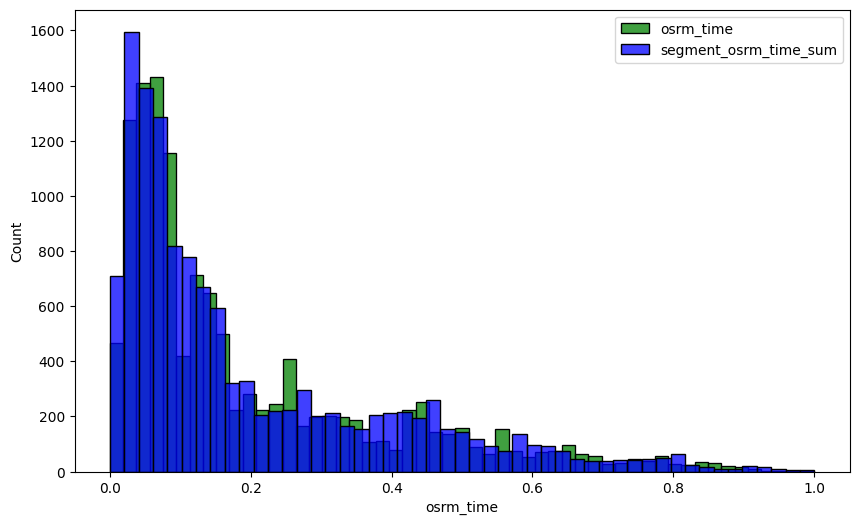

In [45]:
plt.figure(figsize=(10,6))
sns.histplot(trip_df['osrm_time'], color='green')
sns.histplot(trip_df['segment_osrm_time_sum'], color='blue')
plt.legend(['osrm_time', 'segment_osrm_time_sum'])
plt.show()

This is a 2 sample continuous skewed data, so we will use Mann-Whitney U Test

In [46]:
statistic, pvalue = sps.mannwhitneyu(trip_df['osrm_time'], trip_df['segment_osrm_time_sum'], alternative='two-sided')
print('p-value', pvalue)
if pvalue < 0.1:
    print('The samples are not similar')
else:
    print('The samples are similar ')

p-value 0.8230933178296898
The samples are similar 


# 5. Business Insights

- The most common route type is **Carting**
- The top 3 **source states** are **Maharastra, Karnataka and Haryana**
- The top 3 **source cities** are **Bengaluru, Mumbai and Gurgaon**
- The top 3 **destination states** are **Maharastra, Karnataka and Haryana**
- The top 3 **destination cities** are **Bengaluru, Mumbai and Gurgaon**
- Most of the packages are sent and received within Bengaluru, Mumbai and Chennai but the **most bussiest corridor is Bhiwandi-Mumbai**
- Aggregated **actual_time** and aggregated **osrm_time** are **not similar**
- Aggregated **actual_time** and aggregated **segment_actual_time** are **similar**
- Aggregated **osrm_distance** and aggregated **segment_osrm_distance** are **not similar**
- Aggregated **osrm_time** and aggregated **segment_osrm_time** are **similar**

 # 6. Recommendation

- The company should advertise more on route type FTL saying it is faster mode of delivery. This way FTL can be suggested to alteast large organization.
- Cities Bengaluru(Karnataka), Mumbai(Maharastra) and Gurgaon(Haryana) send and recieve the majority of the deliveries. The company should keep the customers of these cities satisfied with the better and faster services. This involves improving the OSRM engine to make better delivery time predictions.